In [1]:
import torch
import torchvision
import numpy as np
import d2lzh_pytorch as d2l

In [2]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

In [3]:
num_inputs = 784
num_outputs = 10

W = torch.tensor(np.random.normal(0, 0.01, (num_inputs, num_outputs)), dtype=torch.float32)
b = torch.zeros(num_outputs, dtype=torch.float32)

In [4]:
W.requires_grad_(requires_grad=True)
b.requires_grad_(requires_grad=True)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], requires_grad=True)

In [5]:
def softmax(X):
    X_exp = X.exp()
    partition = X_exp.sum(dim=1, keepdim=True)
    return X_exp / partition

In [6]:
def net(X):
    return softmax(torch.mm(X.view(-1, num_inputs), W) + b)

In [7]:
def cross_entropy(y_hat, y):
    return -torch.log(y_hat.gather(1, y.view(-1, 1)))

In [8]:
def accuracy(y_hat, y):
    return (y_hat.argmax(dim=1) == y).float().mean().item()

In [9]:
d2l.evaluate_accuracy(test_iter, net)

0.1082

In [10]:
num_epochs, lr = 5, 0.1

In [15]:
d2l.train_ch3(net, train_iter, test_iter, cross_entropy, num_epochs, batch_size, [W, b], lr)

epoch 1, loss 0.4744, train acc 0.840, test acc 0.829
epoch 2, loss 0.4655, train acc 0.843, test acc 0.831
epoch 3, loss 0.4578, train acc 0.845, test acc 0.829
epoch 4, loss 0.4520, train acc 0.847, test acc 0.835
epoch 5, loss 0.4477, train acc 0.848, test acc 0.833


In [16]:
X, y = iter(test_iter).next()
true_labels = d2l.get_fashion_mnist_labels(y.numpy())
pred_labels = d2l.get_fashion_mnist_labels(net(X).argmax(dim=1).numpy())
titles = [true + '\n' + pred for true, pred in zip(true_labels, pred_labels)]

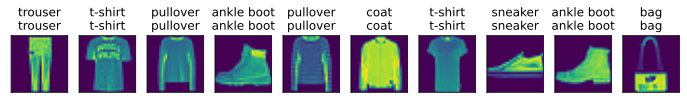

In [18]:
d2l.show_fashion_mnist(X[200:210], titles[200:210])